In [1]:
#import required module

import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date


In [2]:
#data collection

stock_list = pd.read_excel('Daftar Saham.xlsx')
stock_list

,Kode,Nama Perusahaan,Tanggal Pencatatan,Shares,Papan Pencatatan
0,PACK,Solusi Kemasan Digital Tbk.,08 Feb 2023,1.537.546.000,Akselerasi
1,VAST,Vastland Indonesia Tbk.,08 Feb 2023,3.055.700.000,Pengembangan
2,CHIP,Pelita Teknologi Global Tbk.,08 Feb 2023,806.000.000,Akselerasi
3,HALO,Haloni Jane Tbk.,08 Feb 2023,5.650.000.000,Pengembangan
4,KING,Hoffmen Cleanindo Tbk.,16 Feb 2023,2.600.000.000,Akselerasi
...,...,...,...,...,...
848,PEVE,Penta Valent Tbk.,24 Jan 2023,1.765.625.000,Pengembangan
849,LAJU,Jasa Berdikari Logistics Tbk.,27 Jan 2023,2.149.840.000,Pengembangan
850,FWCT,Wijaya Cahaya Timber Tbk.,01 Feb 2023,1.875.000.000,Pengembangan
851,NAYZ,Hassana Boga Sejahtera Tbk.,06 Feb 2023,2.550.000.000,Akselerasi


In [3]:
stock_list['ticker.jk'] = stock_list['Kode'] + ".JK"

In [4]:
stock_list

,Kode,Nama Perusahaan,Tanggal Pencatatan,Shares,Papan Pencatatan,ticker.jk
0,PACK,Solusi Kemasan Digital Tbk.,08 Feb 2023,1.537.546.000,Akselerasi,PACK.JK
1,VAST,Vastland Indonesia Tbk.,08 Feb 2023,3.055.700.000,Pengembangan,VAST.JK
2,CHIP,Pelita Teknologi Global Tbk.,08 Feb 2023,806.000.000,Akselerasi,CHIP.JK
3,HALO,Haloni Jane Tbk.,08 Feb 2023,5.650.000.000,Pengembangan,HALO.JK
4,KING,Hoffmen Cleanindo Tbk.,16 Feb 2023,2.600.000.000,Akselerasi,KING.JK
...,...,...,...,...,...,...
848,PEVE,Penta Valent Tbk.,24 Jan 2023,1.765.625.000,Pengembangan,PEVE.JK
849,LAJU,Jasa Berdikari Logistics Tbk.,27 Jan 2023,2.149.840.000,Pengembangan,LAJU.JK
850,FWCT,Wijaya Cahaya Timber Tbk.,01 Feb 2023,1.875.000.000,Pengembangan,FWCT.JK
851,NAYZ,Hassana Boga Sejahtera Tbk.,06 Feb 2023,2.550.000.000,Akselerasi,NAYZ.JK


In [5]:
ticker_list = stock_list['ticker.jk'].tolist()
ticker_list

['PACK.JK',
 'VAST.JK',
 'CHIP.JK',
 'HALO.JK',
 'KING.JK',
 'PGEO.JK',
 'FUTR.JK',
 'HILL.JK',
 'BDKR.JK',
 'PTMP.JK',
 'SAGE.JK',
 'TRON.JK',
 'TCID.JK',
 'TELE.JK',
 'TFCO.JK',
 'TGKA.JK',
 'TIFA.JK',
 'TINS.JK',
 'TIRA.JK',
 'TIRT.JK',
 'CUAN.JK',
 'NSSS.JK',
 'GTRA.JK',
 'BHAT.JK',
 'CASH.JK',
 'TECH.JK',
 'TOWR.JK',
 'TPIA.JK',
 'TPMA.JK',
 'TRAM.JK',
 'TRIL.JK',
 'TRIM.JK',
 'AALI.JK',
 'ABBA.JK',
 'ABDA.JK',
 'ABMM.JK',
 'ACES.JK',
 'ACST.JK',
 'ADES.JK',
 'ADHI.JK',
 'ADMF.JK',
 'ADMG.JK',
 'ADRO.JK',
 'AGII.JK',
 'AGRO.JK',
 'AGRS.JK',
 'AHAP.JK',
 'AIMS.JK',
 'AISA.JK',
 'AKKU.JK',
 'AKPI.JK',
 'AKRA.JK',
 'AKSI.JK',
 'ALDO.JK',
 'ALKA.JK',
 'ALMI.JK',
 'ALTO.JK',
 'AMAG.JK',
 'AMFG.JK',
 'AMIN.JK',
 'AMRT.JK',
 'ANJT.JK',
 'ANTM.JK',
 'APEX.JK',
 'APIC.JK',
 'APII.JK',
 'APLI.JK',
 'APLN.JK',
 'ARGO.JK',
 'ARII.JK',
 'ARNA.JK',
 'ARTA.JK',
 'ARTI.JK',
 'ARTO.JK',
 'ASBI.JK',
 'ASDM.JK',
 'ASGR.JK',
 'ASII.JK',
 'ASJT.JK',
 'ASMI.JK',
 'ASRI.JK',
 'ASRM.JK',
 'ASSA.JK',
 'AT

In [6]:
start_date = '2020-01-01'
end_date = date.today()
interval = '1d'

stock_data = {}
for ticker in ticker_list:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date, interval=interval)

# Convert the dictionary to a pandas DataFrame with a MultiIndex
dataset = pd.concat(stock_data, axis=1)

dataset

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

PACK.JK                                            VAST.JK         \
              Open   High    Low  Close Adj Close      Volume    Open   High   
Date                                                                           
2023-02-08   160.0  160.0  146.0  146.0     146.0   8127200.0   115.0  141.0   
2023-02-09   132.0  132.0  132.0  132.0     132.0    773600.0    94.0  105.0   
2023-02-10   119.0  134.0  119.0  124.0     124.0  75577100.0    97.0  122.0   
2023-02-13   125.0  125.0  112.0  112.0     112.0  16344800.0   122.0  126.0   
2023-02-14   103.0  115.0  101.0  102.0     102.0  27309200.0   105.0  116.0   
...            ...    ...    ...    ...       ...         ...     ...    ...   
2021-07-20     NaN    NaN    NaN    NaN       NaN         NaN     NaN    NaN   
2022-05-03     NaN    NaN    NaN    NaN       NaN         NaN     NaN    NaN   
2022-05-04     NaN    NaN    NaN    NaN       NaN         NaN     NaN    NaN   
2022-05-05     NaN    NaN    NaN    NaN       NaN         NaN     NaN    NaN   
2022-05-06     NaN    NaN    NaN    NaN       NaN         NaN     NaN    NaN   

                          ... NAYZ.JK                             IRSX.JK  \
              Low  Close  ...     Low Close Adj Close      Volume    Open   
Date                      ...                                               
2023-02-08  101.0  101.0  ...    73.0  73.0      73.0  24613800.0   105.0   
2023-02-09   94.0   96.0  ...    66.0  75.0      75.0  13056900.0   100.0   
2023-02-10   96.0  120.0  ...    68.0  72.0      72.0   4873400.0   100.0   
2023-02-13  112.0  112.0  ...    67.0  76.0      76.0   6647700.0    87.0   
2023-02-14  105.0  108.0  ...    73.0  81.0      81.0  13522100.0    94.0   
...           ...    ...  ...     ...   ...       ...         ...     ...   
2021-07-20    NaN    NaN  ...     NaN   NaN       NaN         NaN     NaN   
2022-05-03    NaN    NaN  ...     NaN   NaN       NaN         NaN     NaN   
2022-05-04    NaN    NaN  ...     NaN   NaN       NaN         NaN     NaN   
2022-05-05    NaN    NaN  ...     NaN   NaN       NaN         NaN     NaN   
2022-05-06    NaN    NaN  ...     NaN   NaN       NaN         NaN     NaN   

                                                       
             High   Low  Close Adj Close       Volume  
Date                                                   
2023-02-08  112.0  97.0  101.0     101.0  259509500.0  
2023-02-09  103.0  96.0  100.0     100.0  214969800.0  
2023-02-10  100.0  93.0   93.0      93.0   91599500.0  
2023-02-13  103.0  87.0   94.0      94.0  257447400.0  
2023-02-14   99.0  92.0   95.0      95.0  202454500.0  
...           ...   ...    ...       ...          ...  
2021-07-20    NaN   NaN    NaN       NaN          NaN  
2022-05-03    NaN   NaN    NaN       NaN          NaN  
2022-05-04    NaN   NaN    NaN       NaN          NaN  
2022-05-05    NaN   NaN    NaN       NaN          NaN  
2022-05-06    NaN   NaN    NaN       NaN          NaN  

[841 rows x 5118 columns]

In [7]:
dataset = dataset[dataset.columns[4::6]]
dataset.columns = dataset.columns.droplevel(1)
dataset

,PACK.JK,VAST.JK,CHIP.JK,HALO.JK,KING.JK,PGEO.JK,FUTR.JK,HILL.JK,BDKR.JK,PTMP.JK,...,CBPE.JK,SUNI.JK,CBRE.JK,WINE.JK,BMBL.JK,PEVE.JK,LAJU.JK,FWCT.JK,NAYZ.JK,IRSX.JK
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-08,146.0,101.0,176.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,...,148.0,296.0,90.0,372.0,68.0,204.0,173.0,112.0,73.0,101.0
2023-02-09,132.0,96.0,193.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,...,149.0,298.0,84.0,368.0,64.0,200.0,206.0,128.0,75.0,100.0
2023-02-10,124.0,120.0,212.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,...,147.0,306.0,88.0,344.0,65.0,200.0,244.0,130.0,72.0,93.0
2023-02-13,112.0,112.0,232.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,152.0,300.0,85.0,324.0,65.0,199.0,228.0,144.0,76.0,94.0
2023-02-14,102.0,108.0,230.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,...,149.0,312.0,80.0,304.0,65.0,208.0,214.0,134.0,81.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset['BMRI Return D+2']= (dataset['BMRI.JK'].shift(periods=2)-dataset['BMRI.JK'])*100/dataset['BMRI.JK']
dataset['BMRI Return D+2'].describe()

/var/folders/fy/zhbysd194v9gxlrksl8f4bp80000gn/T/ipykernel_24501/2533644097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['BMRI Return D+2']= (dataset['BMRI.JK'].shift(periods=2)-dataset['BMRI.JK'])*100/dataset['BMRI.JK']


count    798.000000
mean       0.094788
std        4.556347
min      -21.862344
25%       -1.733104
50%        0.000000
75%        1.409721
max       61.820884
Name: BMRI Return D+2, dtype: float64

In [9]:
dataset

,PACK.JK,VAST.JK,CHIP.JK,HALO.JK,KING.JK,PGEO.JK,FUTR.JK,HILL.JK,BDKR.JK,PTMP.JK,...,SUNI.JK,CBRE.JK,WINE.JK,BMBL.JK,PEVE.JK,LAJU.JK,FWCT.JK,NAYZ.JK,IRSX.JK,BMRI Return D+2
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-08,146.0,101.0,176.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,...,296.0,90.0,372.0,68.0,204.0,173.0,112.0,73.0,101.0,NaN
2023-02-09,132.0,96.0,193.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN,...,298.0,84.0,368.0,64.0,200.0,206.0,128.0,75.0,100.0,NaN
2023-02-10,124.0,120.0,212.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,...,306.0,88.0,344.0,65.0,200.0,244.0,130.0,72.0,93.0,-0.970872
2023-02-13,112.0,112.0,232.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,85.0,324.0,65.0,199.0,228.0,144.0,76.0,94.0,-0.966182
2023-02-14,102.0,108.0,230.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,...,312.0,80.0,304.0,65.0,208.0,214.0,134.0,81.0,95.0,-0.722898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset = dataset.sort_index(ascending=False)
dataset = dataset.reset_index()
dataset

,Date,PACK.JK,VAST.JK,CHIP.JK,HALO.JK,KING.JK,PGEO.JK,FUTR.JK,HILL.JK,BDKR.JK,...,SUNI.JK,CBRE.JK,WINE.JK,BMBL.JK,PEVE.JK,LAJU.JK,FWCT.JK,NAYZ.JK,IRSX.JK,BMRI Return D+2
0,2023-04-05,160.0,112.0,1460.0,286.0,258.0,665.0,109.0,1875.0,256.0,...,302.0,57.0,705.0,58.0,173.0,332.0,97.0,113.0,139.0,0.717703
1,2023-04-04,164.0,114.0,1460.0,260.0,256.0,660.0,115.0,1990.0,258.0,...,296.0,56.0,565.0,64.0,182.0,312.0,99.0,105.0,140.0,-0.721154
2,2023-04-03,154.0,114.0,1460.0,220.0,264.0,655.0,121.0,2030.0,258.0,...,294.0,54.0,585.0,71.0,157.0,318.0,95.0,100.0,140.0,-2.850356
3,2023-03-31,155.0,112.0,1460.0,212.0,252.0,695.0,109.0,2020.0,256.0,...,292.0,55.0,550.0,72.0,161.0,326.0,98.0,96.0,119.0,0.242131
4,2023-03-30,161.0,115.0,1460.0,206.0,246.0,705.0,117.0,1920.0,252.0,...,296.0,56.0,525.0,73.0,164.0,330.0,100.0,106.0,120.0,-0.977995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333328
837,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.644740
838,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.973688
839,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.820884


In [11]:
dataset['BMRI Return D+2'] = (dataset['BMRI.JK'].shift(periods=2)-dataset['BMRI.JK'])*100/dataset['BMRI.JK']

In [12]:
dataset['BMRI Return D+2'].describe()

count    763.000000
mean       0.096290
std        3.195566
min      -18.897638
25%       -1.423654
50%        0.000000
75%        1.757479
max       15.803100
Name: BMRI Return D+2, dtype: float64

In [13]:
dataset.dropna(axis=0, how='all', inplace=True)
dataset.dropna(axis=1, how='all', inplace=True)
dataset.corrwith(dataset['BMRI Return D+2'], axis=0, numeric_only=True)['BMRI.JK']

0.0016164837107662017

In [14]:
#from statistics import mean, stdev

#dataset.iloc[:,0:-1]=dataset.iloc[:,0:-1].apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [15]:
#dataset

In [16]:
#dataset.corrwith(dataset['BMRI Return D+2'], axis=0, numeric_only=True)

In [17]:

dataset.insert(len(dataset.columns)-2, 'BMRI.JK', dataset.pop('BMRI.JK'))
dataset

/var/folders/fy/zhbysd194v9gxlrksl8f4bp80000gn/T/ipykernel_24501/85476068.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.insert(len(dataset.columns)-2, 'BMRI.JK', dataset.pop('BMRI.JK'))


,Date,PACK.JK,VAST.JK,CHIP.JK,HALO.JK,KING.JK,PGEO.JK,FUTR.JK,HILL.JK,BDKR.JK,...,CBRE.JK,WINE.JK,BMBL.JK,PEVE.JK,LAJU.JK,FWCT.JK,NAYZ.JK,IRSX.JK,BMRI.JK,BMRI Return D+2
0,2023-04-05,160.0,112.0,1460.0,286.0,258.0,665.0,109.0,1875.0,256.0,...,57.0,705.0,58.0,173.0,332.0,97.0,113.0,139.0,5225.000000,NaN
1,2023-04-04,164.0,114.0,1460.0,260.0,256.0,660.0,115.0,1990.0,258.0,...,56.0,565.0,64.0,182.0,312.0,99.0,105.0,140.0,5200.000000,NaN
2,2023-04-03,154.0,114.0,1460.0,220.0,264.0,655.0,121.0,2030.0,258.0,...,54.0,585.0,71.0,157.0,318.0,95.0,100.0,140.0,5262.500000,-0.712589
3,2023-03-31,155.0,112.0,1460.0,212.0,252.0,695.0,109.0,2020.0,256.0,...,55.0,550.0,72.0,161.0,326.0,98.0,96.0,119.0,5162.500000,0.726392
4,2023-03-30,161.0,115.0,1460.0,206.0,246.0,705.0,117.0,1920.0,252.0,...,56.0,525.0,73.0,164.0,330.0,100.0,106.0,120.0,5112.500000,2.933985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3134.833740,2.999997
837,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3176.631348,1.315792
838,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3176.631348,-1.315784
839,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3228.878662,-1.618126


In [18]:
dataset.iloc[:,1:-1] = (dataset.iloc[:,1:-1]-dataset.iloc[:,1:-1].shift(periods=-1))*100/dataset.iloc[:,1:-1].shift(periods=-1)
dataset.fillna(0)
#dataset.iloc[:,1:-1]=dataset.iloc[:,1:-1].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dataset

,Date,PACK.JK,VAST.JK,CHIP.JK,HALO.JK,KING.JK,PGEO.JK,FUTR.JK,HILL.JK,BDKR.JK,...,CBRE.JK,WINE.JK,BMBL.JK,PEVE.JK,LAJU.JK,FWCT.JK,NAYZ.JK,IRSX.JK,BMRI.JK,BMRI Return D+2
0,2023-04-05,-2.439024,-1.754386,0.0,10.000000,0.781250,0.757576,-5.217391,-5.778894,-0.775194,...,1.785714,24.778761,-9.375000,-4.945055,6.410256,-2.020202,7.619048,-0.714286,0.480769,NaN
1,2023-04-04,6.493506,0.000000,0.0,18.181818,-3.030303,0.763359,-4.958678,-1.970443,0.000000,...,3.703704,-3.418803,-9.859155,15.923567,-1.886792,4.210526,5.000000,0.000000,-1.187648,NaN
2,2023-04-03,-0.645161,1.785714,0.0,3.773585,4.761905,-5.755396,11.009174,0.495050,0.781250,...,-1.818182,6.363636,-1.388889,-2.484472,-2.453988,-3.061224,4.166667,17.647059,1.937046,-0.712589
3,2023-03-31,-3.726708,-2.608696,0.0,2.912621,2.439024,-1.418440,-6.837607,5.208333,1.587302,...,-1.785714,4.761905,-1.369863,-1.829268,-1.212121,-2.000000,-9.433962,-0.833333,0.977995,0.726392
4,2023-03-30,6.622517,3.603604,0.0,0.980392,9.821429,-0.704225,-6.400000,-6.796117,-0.787402,...,-3.448276,25.000000,-1.351351,-1.204819,-2.366864,-0.990099,9.278351,-6.976744,-1.207729,2.933985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.315784,2.999997
837,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.315792
838,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.618126,-1.315784
839,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.322581,-1.618126


In [19]:
corr_stock = dataset.corrwith(dataset['BMRI Return D+2'], axis=0, drop=True, numeric_only=True).nlargest(10)
corr_stock

GTRA.JK            1.000000
BMRI Return D+2    1.000000
HALO.JK            0.467141
NSSS.JK            0.400982
KING.JK            0.390919
PTMP.JK            0.342502
PEVE.JK            0.293291
NINE.JK            0.263959
KETR.JK            0.244587
WINR.JK            0.233210
dtype: float64

In [36]:
dataset[['GTRA.JK', 'BMRI Return D+2', 'CHIP.JK', 'BMRI.JK','Date']].head(50)

,GTRA.JK,BMRI Return D+2,CHIP.JK,BMRI.JK,Date
0,8.593750,NaN,0.000000,0.480769,2023-04-05
1,-4.477612,NaN,0.000000,-1.187648,2023-04-04
2,6.349206,-0.712589,0.000000,1.937046,2023-04-03
3,24.752475,0.726392,0.000000,0.977995,2023-03-31
4,NaN,2.933985,0.000000,-1.207729,2023-03-30
5,NaN,-0.241546,0.000000,2.222222,2023-03-29
6,NaN,0.987654,9.774436,-0.735294,2023-03-28
7,NaN,1.470588,9.917355,-1.645633,2023-03-27
8,NaN,-2.368827,NaN,NaN,2023-03-24
9,NaN,NaN,NaN,NaN,2023-03-23


In [30]:
dataset.isnull().sum()

Date                 0
PACK.JK            804
VAST.JK            804
CHIP.JK            804
HALO.JK            804
                  ... 
FWCT.JK            799
NAYZ.JK            802
IRSX.JK            803
BMRI.JK             71
BMRI Return D+2     78
Length: 850, dtype: int64

In [31]:
dataset_fillna = dataset.fillna(0)
dataset_fillna.isnull().sum()

Date               0
PACK.JK            0
VAST.JK            0
CHIP.JK            0
HALO.JK            0
                  ..
FWCT.JK            0
NAYZ.JK            0
IRSX.JK            0
BMRI.JK            0
BMRI Return D+2    0
Length: 850, dtype: int64

In [32]:
corr_stock = dataset_fillna.corrwith(dataset_fillna['BMRI Return D+2'], axis=0, drop=True, numeric_only=True).nlargest(10)
corr_stock

BMRI Return D+2    1.000000
DMAS.JK            0.152002
TELE.JK            0.142962
BTPN.JK            0.138426
INDS.JK            0.130728
ADMF.JK            0.123423
CLPI.JK            0.115732
KRAH.JK            0.115437
PJAA.JK            0.115288
CEKA.JK            0.111916
dtype: float64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

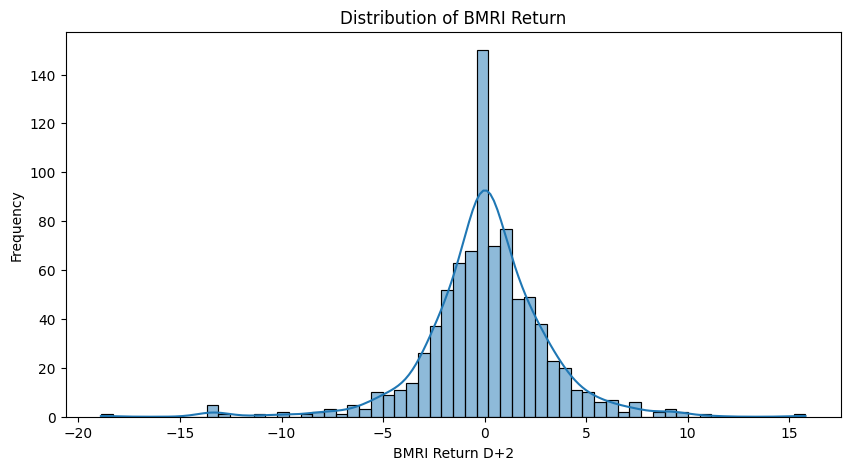

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(dataset_fillna['BMRI Return D+2'], kde=True)
plt.xlabel('BMRI Return D+2')
plt.ylabel('Frequency')
plt.title('Distribution of BMRI Return')
plt.show()


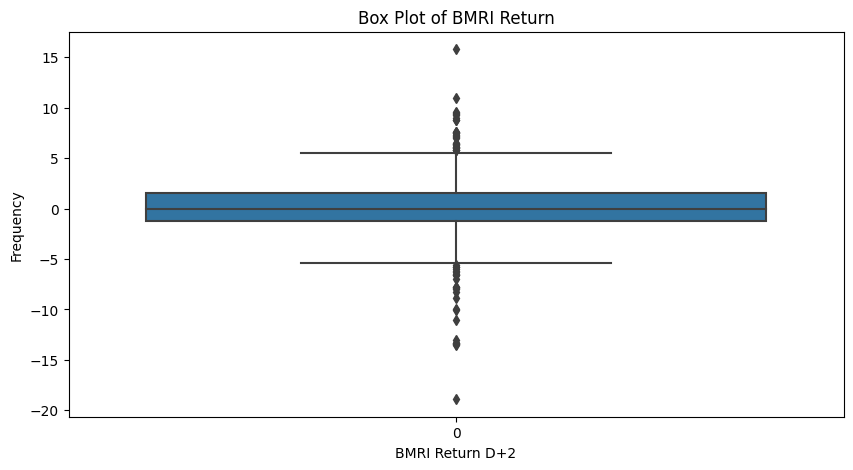

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(dataset_fillna['BMRI Return D+2'])
plt.xlabel('BMRI Return D+2')
plt.ylabel('Frequency')
plt.title('Box Plot of BMRI Return')
plt.show()

In [41]:
dataset_fillna['BMRI Return D+2'].describe()

count    841.000000
mean       0.087360
std        3.043715
min      -18.897638
25%       -1.239666
50%        0.000000
75%        1.518990
max       15.803100
Name: BMRI Return D+2, dtype: float64

In [45]:
from scipy.stats import shapiro
shapiro_test = shapiro(dataset_fillna['BMRI Return D+2'])
print(f'Shapiro-Wilk Test: Test statistic = {shapiro_test[0]}, p-value = {shapiro_test[1]}')
shapiro_test


Shapiro-Wilk Test: Test statistic = 0.9222304821014404, p-value = 2.077855080513331e-20


ShapiroResult(statistic=0.9222304821014404, pvalue=2.077855080513331e-20)

In [54]:
lower_bound = dataset_fillna['BMRI Return D+2'].quantile(0.1)
upper_bound = dataset_fillna['BMRI Return D+2'].quantile(0.9)
data_cleaned = dataset_fillna['BMRI Return D+2'].clip(lower_bound, upper_bound)
data_cleaned

0      0.000000
1      0.000000
2     -0.712589
3      0.726392
4      2.933985
         ...   
836    2.999997
837    1.315792
838   -1.315784
839   -1.618126
840   -1.935487
Name: BMRI Return D+2, Length: 841, dtype: float64

In [55]:
shapiro(data_cleaned)

ShapiroResult(statistic=0.949129581451416, pvalue=1.971734544274891e-16)

In [56]:
from scipy.stats import pearsonr

def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return p

r_pvalues(dataset_fillna[[
    'BMRI Return D+2',
    'DMAS.JK',
    'TELE.JK',
    'BTPN.JK',
    'INDS.JK',
    'ADMF.JK',
    'CLPI.JK',
    'KRAH.JK',
    'PJAA.JK',
    'CEKA.JK']])

,BMRI Return D+2,DMAS.JK,TELE.JK,BTPN.JK,INDS.JK,ADMF.JK,CLPI.JK,KRAH.JK,PJAA.JK,CEKA.JK
BMRI Return D+2,0.0,0.0,0.0,0.0001,0.0001,0.0003,0.0008,0.0008,0.0008,0.0012
DMAS.JK,0.0,0.0,0.0,0.0,0.1463,0.0,0.0038,0.0072,0.0,0.0
TELE.JK,0.0,0.0,0.0,0.0,0.1142,0.0,0.0,0.3042,0.0181,0.0
BTPN.JK,0.0001,0.0,0.0,0.0,0.0915,0.0,0.0,0.0001,0.0,0.0
INDS.JK,0.0001,0.1463,0.1142,0.0915,0.0,0.0005,0.1041,0.029,0.009,0.0008
ADMF.JK,0.0003,0.0,0.0,0.0,0.0005,0.0,0.0,0.6136,0.0,0.0
CLPI.JK,0.0008,0.0038,0.0,0.0,0.1041,0.0,0.0,0.1008,0.0,0.0
KRAH.JK,0.0008,0.0072,0.3042,0.0001,0.029,0.6136,0.1008,0.0,0.1438,0.2307
PJAA.JK,0.0008,0.0,0.0181,0.0,0.009,0.0,0.0,0.1438,0.0,0.0
CEKA.JK,0.0012,0.0,0.0,0.0,0.0008,0.0,0.0,0.2307,0.0,0.0
